<a href="https://colab.research.google.com/github/idrissdeme/Exerc-cos_Python_UERJ_202/blob/main/projeto2_perceptrons_normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 2 - Perceptrons _ Idrissa Deme e Iasmin 

Nesse segundo projeto da disciplina de Introdução a Python, vamos construir uma classe de um modelo de Redes Neurais, que é a base das Redes Neurais clássicas e Redes Neurais Profundas (Deep Learning), chamado Peceptron.

No mundo atual, o aprendizado de máquina está presente em muitas tecnologias à nossa volta: classificação de bilhões de imagens (por exemplo, Google Images), reconhecimento de fala (por exemplo, a Siri da Apple), recomendação de vídeos no YouTube, entre muitas outras.

![Aprendizado Supervisionado](https://miro.medium.com/max/1400/1*eEKb2RxREV6-MtLz2DNWFQ.gif)

O Perceptron é uma das arquiteturas de Redes Neurais Artificiais mais simples que existem. Foi inventado em 1957 por Frank Rosenblatt. 

Para entender como um Perceptron funciona, vamos começar com um esquema do perceptron original, sem muitos detalhes. 

O Perceptron:
* toma alguns inputs, 
* faz um processamento 
* retorna um único output.

![perceptrons](https://raw.githubusercontent.com/malbouis/Python_intro/master/aulas_2020-1/pics/perceptrons%201.png)

Antes de continuar, vamos pensar em um exemplo concreto.

Vamos considerar um conjunto de dados de flores Iris, e suas três espécies: Iris-Setosa, Iris-Versicolor e Iris-Virgina, que têm as seguintes características:
* comprimento e largura da sépala;
* comprimento e largura da pétala.

**Iris dataset**: Famoso conjunto de dados com o comprimento e a largura das pétalas e sépalas de 150 flores Iris de 3 espécies diferentes: Iris-Setosa, Iris-Versicolor e Iris-Virginica.

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

### Funcionamento do Perceptron

Podemos pensar no Perceptron como um mecanismo que toma como input as *features* (características) de uma Iris (comprimento e largura da sépala e da pétala) e nos retorna a **classificação** da espécie da flor, ou a maior probabilidade de que seja de uma dada espécie.

É importante notar que o Perceptron tem um comportamento **binário**, ou seja, só podemos comparar *duas* espécies de flores com o Perceptron.

Na nossa representação simples do perceptron acima, teríamos:

![](https://raw.githubusercontent.com/malbouis/Python_intro/master/aulas_2020-1/pics/perceptrons2.png)

#### Processamento

O Processamento do Perceptron, é onde se dá a decisão do mecanismo. 

A fórmula para a decisão do neurônio perceptron é relativamente simples:

$
    output=\left\{
                \begin{array}{ll}
                  0, se \sum_j w_j x_j \leq b\\
                  1, se \sum_j w_j x_j > b\\
                \end{array}
              \right.
  $

Essa fórmula é conhecida como *Heaviside stepfunction*.



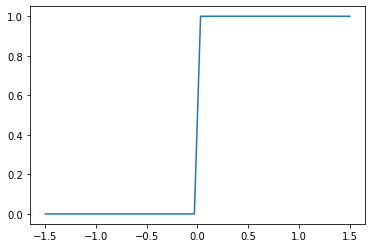

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace (-1.5,1.5)
y = np.heaviside(x,0)

plt.plot(x,y)

A fórmula de decisão do neurônio (perceptron), também é chamada de **função de ativação**.

Podemos reescrevê-la da seguinte forma:

$
    ativação=\left\{
                \begin{array}{ll}
                  1, se \sum_j w_j x_j + b > 0\\
                  0, se \sum_j w_j x_j + b \leq 0\\
                \end{array}
              \right.
  $

Podemos incorporar b no somatório da primeira linha da equação acima, considerando: $w_0=b$ e $x_0 = 1$. Sendo assim, a função de ativação pode ser reescrita como:

$
    f(x)=\left\{
                \begin{array}{ll}
                  1, se \sum_{j=0}^{N} w_j x_j > 0\\
                  0, para \; o \; resto\\
                \end{array}
              \right.
  $

E assim incorporamos o $b$, que também é conhecido como **bias**, como  peso $w_0 = b$ do input $x_0=1$ do nosso peceptron, que vai tomando corpo:

![](https://raw.githubusercontent.com/malbouis/Python_intro/master/aulas_2020-1/pics/perceptrons4.png)


Por simplicidade, usaremos a função de ativação de Heaviside, entretanto essa função pode variar. Pode ser, por exemplo, uma função [*sigmoide*](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_sigmoide).

## Como se dá a classificação das Iris? Ou, como os perceptrons aprendem?


O primeiro passo é **treinar** o nosso Perceptron: em um conjunto de dados em que **sabemos as espécies das Iris a priori**;

### Treino

Para cada **conjunto de inputs** (features):
   1. Compararamos o output ($f(x)$, a classificação do nosso perceptron, que chamaremos de **prediction**) com a espécie real da flor (chamaremos de y e identificaremos como **label**);
   1. Baseados no **resultado da comparação entre prediction e label**, devemos **ajustar os pesos** caso o perceptron não esteja acertando corretamente a classificação.
   1. O último passo é **testar** o nosso perceptron: em um outro conjunto de dados, comparamos a classificação fornecida pelo perceptron com a real espécie da flor (**label**);

### Prediction

A predição do perceptron é calculada pela função de ativação. No nosso exemplo, ela é a *Heaviside Stepfunction*, que escrevemos acima:

$
    f(x)=\left\{
                \begin{array}{ll}
                  1, se \sum_{j=0}^{N} w_j x_j > 0\\
                  0, para \; o \; resto\\
                \end{array}
              \right.
  $

* Note que tanto os inputs quanto os pesos são matrizes (ou arrays), logo o produto do somatório é um produto matricial (ou escalar). *Dica: o numpy tem uma função [numpy.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) que implementa produto escalar.* 

* Note também que na nossa construção do perceptron, o primeiro elemento do array dos inputs é o número 1 e o primeiro elemento do array dos pesos é o b (**bias**).

### Comparação entre prediction / label e ajuste do perceptron

Consideremos que o nosso perceptron teve um output, $f(x)$ e que o output esperado (o real, do qual nós temos a informação a priori, o label) é $y$.

A comparação entre o output esperado e o obtido é simplesmente:

`e = output_esperado - output_obtido`

ou

$e = y - f(x)$

O que queremos é rodar o perceptron sobre os inputs até que a diferença acima (ou o erro na predição) seja o menor possível.

A melhor forma de fazer isso é corrigindo os pesos de cada input, pelo erro de predição.

### Ajuste dos pesos

O ajuste dos pesos é dado por:

$w \rightarrow w + lr*e*x$

onde 

`lr`: learning rate

`e`: erro do output em relação ao label

`x`: conjunto de inputs (features)


Essa atualização dos pesos é feita de forma iterativa e o número de iterações é determinado pelo que chamamos de **threshold**, também conhecido como **época**.


## PROJETO

1. Criar uma `Classe` Perceptron em Python. Vocês podem seguir o esqueleto de Classe apresentado abaixo.

2. Aplique essa classe nos dados das flores Iris para determinar se uma Iris com um certo comprimento e largura da **pétala** é uma Iris Setosa.

3. Compare o resultado da sua classe com a classe Peceptron do módulo do scikit-learn `linear_model`.

4. Você pode pensar em algum outro exemplo em que possa aplicar o modelo do Perceptron? Quando esse modelo falha?

## PROJETO

1. Criando uma `Classe` Perceptron em Python. Vocês podem seguir o esqueleto de Classe apresentado abaixo.

In [2]:
## CLASSE PERCEPTRON
import numpy as np

class MyPerceptron():

    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        '''
        método de inicialização que tem os seguintes atributos:
        no_of_inputs: número de features passadas como input ao perceptron
        threshold: número de iterações de atualização do peso
        learning_rate: taxa com a qual os pesos são atualizados a cada iteração
        weights: inicialização dos pesos (dica: pode inicializar com método np.zeros). Não se esquecer que o vetor dos pesos
        terá no_of_inputs + 1 elementos por conta do bias que é o primeiro elemento.
        '''
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1) # no_of_inputs + 1 elementos pois o bias é o primeiro elemento
           
    def predict(self, inputs):
      '''
      método de implementação da função de ativação.
      inputs: array com o conjunto de inputs (features). No projeto pedimos que considerassem o comprimento e largura da pétala da Iris.
      Não se esquecer que o produto da função de ativação é um produto escalar e pode ser calculado pelo método np.dot
      '''
      S = np.dot( inputs, self.weights[1:] )  +  self.weights[0]    # Usando o método np.dot para o produto escalar
      #S= sigmoid(S)    
      if S > 0 :
        return 1
      else:
        return 0

    def train(self, training_inputs, labels):
      '''
      método de treino. É aqui que os pesos são atualizados um certo número de vezes (determinado pelo valor do threshold).
      Nesse método é feita a comparação entre o resultado da função de ativação (predição) e
      o resultado esperado (label).
      O método deve atualizar tanto os pesos quanto o bias (lembre que o bias é o primeiro valor do vetor peso e tem input 1.)
      A atualização é feita iterativamente um número (threshold) de vezes.
      '''
      i = 0;
      while i < self.threshold :
        for inputs, label in zip(training_inputs, labels):
            prediction = self.predict(inputs)
            #Fazendo a comparação entre o resultado da função de ativação (predição) e o resultado esperado (label).
            e = label - prediction
            self.weights[1:] += self.learning_rate * e * inputs
            self.weights[0] += self.learning_rate * e
        i = i+1   

2. Aplicando a classe nos dados das flores Iris para determinar se uma Iris com um certo comprimento e largura da **pétala** é uma Iris Setosa.

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris() # returns a dictionary-like object
# características (features) das flores Iris:
print(iris.target_names)    # target = label
print(iris.feature_names)

# Pelo primeiro print acima, as features são: 0: sepal length, 1: sepal width, 2: petal length, 3: petal width
# Vamos selecionar somente as features petal length e petal width:
X = iris.data[:, (2,3)]  # nos retorna um array com 150 conjuntos de inputs
#len(iris.data[:,(2,3)])
y = (iris.target == 0).astype(int)  # label = iris setosa. Retorna uma lista com os labels da Iris-Setosa. 0: não, 1: sim
print("iris setosa classification: ", y)

perceptron_clf = Perceptron()      # dois inputs: comprimento e largura da pétala
perceptron_clf.fit(X,y)            # Train

y_pred = perceptron_clf.predict([[1,0.5]])  # predict
print(y_pred)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris setosa classification:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[1]


In [18]:
# Modelo de como deve funcionar com a classe criada nesse projeto

perceptron = MyPerceptron(2)
X = iris.data[:, (2,3)]             # inputs
y = (iris.target == 0).astype(int)  # label = iris setosa. Retorna uma lista com os labels da Iris-Setosa. 0: não, 1: sim
#print(y)

treino = perceptron.train(X,y)

pred = perceptron.predict([1,0.5]) 
if pred == 1:
  print('É uma Iris Setosa')
else:
  print('NÃO É uma Iris Setosa')

É uma Iris Setosa


3. Comparando o resultado da sua classe com a classe Peceptron do módulo do scikit-learn `linear_model`.

In [7]:
from sklearn.linear_model import Perceptron
X = iris.data[:, (2,3)] 
y = (iris.target == 0).astype(int)
perceptron_clf = Perceptron()
perceptron_clf.fit(X,y)      # Train
y_pred = perceptron_clf.predict([[1,0.5]])  # predict  4, 0.5  -   1.4, 0.2
#print(y_pred)

if y_pred == pred:
  print('Nosso Perceptron e o do sklearn são COMPATÍVEIS')
else:
  print('Nosso Perceptron e o do sklearn são INCOMPATÍÍVEIS')

Nosso Perceptron e o do sklearn são COMPATÍVEIS


4. Você pode pensar em algum outro exemplo em que possa aplicar o modelo do Perceptron? Quando esse modelo falha?

Se o conjunto for linearmente separável (resultando por exemplo num booleano -and, or,...-), o perceptron consegue classificar. Podemos usar nosso percetron por exemplo para saber se tem um carro ou não numa garagem. 

O modelo percetron falha quando o padrão não é linearmente separável (um XOR por exemplo)

No exemplo acima, usamos somente dois inputs: o comprimento e a largura da pétala. 
* Você pode expandir o código para considerar também o comprimento e largura da sépala como features;
* Você pode separar a amostra das Iris em duas: uma para treino e outra para teste. O scikit-learn tem um método que faz isso pra você: o `train_test_slit`; Compare cada uma das Iris de teste com o label ==> coloque o resultado em um gráfico (classificação versus label);
* **Ponto extra** para quem implementar a função de ativação sigmoid no lugar da Heaviside e/ou melhorar a estimativa do erro.

Expandindo o código para considerar também o comprimento e largura da sépala como features;

In [9]:
perceptron = MyPerceptron(4)
X = iris.data[:, (0,1,2,3)]             # inputs
y = (iris.target == 0).astype(int)  # label = iris setosa. Retorna uma lista com os labels da Iris-Setosa. 0: não, 1: sim
#print(y)

treino = perceptron.train(X,y)
#pred = perceptron.predict([1, 0.5, 1, 0.5]) # não dá iris setos
pred = perceptron.predict([4, 0.5,1.4, 0.2]) #   4, 0.5  -   1.4, 0.2 --Dá iris setosa
if pred == 1:
  print('É uma Iris Setosa')
else:
  print('NÃO É uma Iris Setosa')

É uma Iris Setosa


Você pode separar a amostra das Iris em duas: uma para treino e outra para teste. O scikit-learn tem um método que faz isso pra você: o train_test_slit; Compare cada uma das Iris de teste com o label ==> coloque o resultado em um gráfico (classificação versus label);

In [47]:
perceptron = MyPerceptron(2)

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = iris.data[:, (2,3)]             # inputs
y = (iris.target == 0).astype(int)  # label = iris setosa. Retorna uma lista com os labels da Iris-Setosa. 0: não, 1: sim
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
treino = perceptron.train(X_train,y_train)
#print(t)
pred = perceptron.predict(X_test[3])  #   testando comparando com um elemento de X_test

if pred == 1:
  print('É uma Iris Setosa')
else:
  print('NÃO É uma Iris Setosa')

É uma Iris Setosa


In [19]:
#X_test
y_resposta = []

for i in X_test:
  pred = perceptron.predict(i)
  y_resposta.append(pred)

<function matplotlib.pyplot.show>

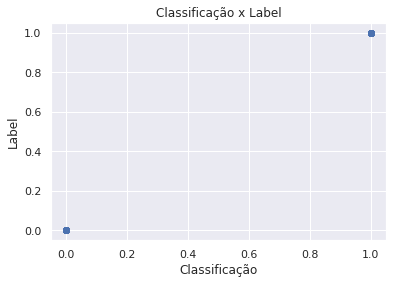

In [35]:
plt.scatter(y_resposta,y_test)
plt.title("Classificação x Label" )
plt.xlabel('Classificação')
plt.ylabel('Label')
plt.show

In [22]:
length=[]
width =[]

for i in X_test:
  length.append(i[0])
  width.append(i[1])

In [ ]:
import pandas as pd
df= pd.DataFrame({"length":length, "width":width, "y_resposta":y_resposta, "y_test":y_test})
df

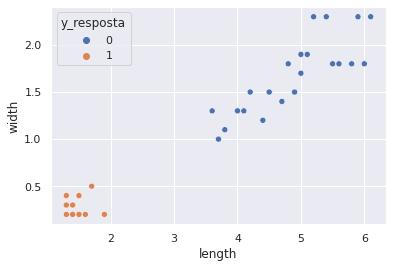

In [30]:
#Classificação da resposta
import seaborn as sns
sns.set_theme()

#sns.scatterplot(data=df,x="length",y="width",hue="y_resposta", style="y_test")
sns.scatterplot(data=df,x="length",y="width",hue="y_resposta")


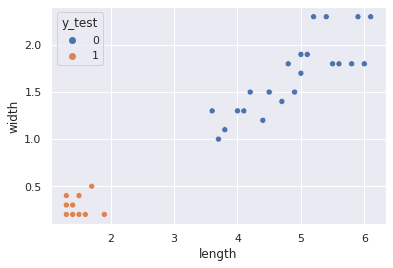

In [29]:
#Classificação dos dados de test
sns.scatterplot(data=df,x="length",y="width",hue="y_test")

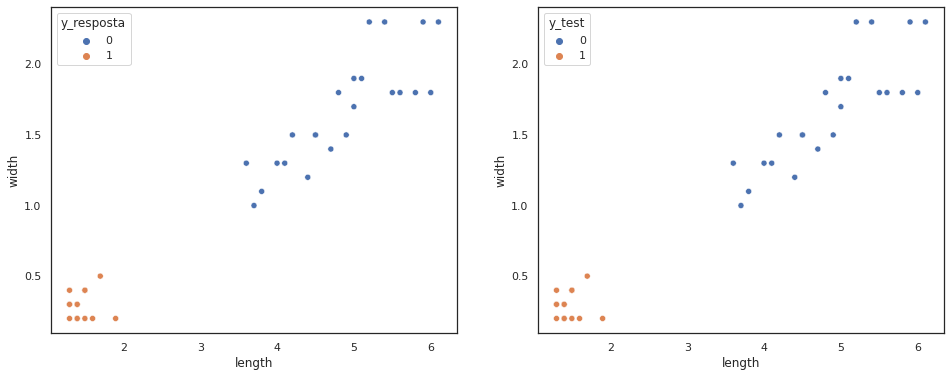

In [34]:
# colocando um ao lado do outro
f = plt.figure(figsize=(16, 6))
gs = f.add_gridspec(1, 2)

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 0])
    sns.scatterplot(data=df,x="length",y="width",hue="y_resposta")

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    sns.scatterplot(data=df,x="length",y="width",hue="y_test")

In [38]:
# Usando a matriz de confusão para comparar
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_resposta,y_test))


[[23  0]
 [ 0 15]]


In [77]:
#Do modelo sklearn
from sklearn.metrics import plot_confusion_matrix
fig=plot_confusion_matrix(perceptron_clf,X_test,y_test)

fig.figure_.suptitle("Confusion Matrix")
plt.figure(figsize=(10,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

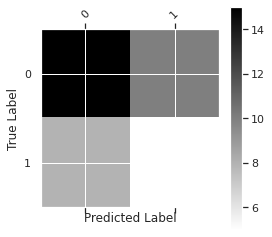

In [76]:
# de nosso modelo
#df_confusion = pd.crosstab(y_test, y_resposta,margins=True)
y_actu = pd.Series(y_test, name='True')
y_pred = pd.Series(y_resposta, name='Predicted')
#df_confusion = pd.crosstab(y_test, y_resposta, rownames=['True'], colnames=['Predicted'], margins=True)
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['True Label'], colnames=['Predicted Label'])
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

## Referências:

1. Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow, Aurélion Géron, O'Reilly;
1. *Introdução ao numpy*: https://sebastianraschka.com/pdf/books/dlb/appendix_f_numpy-intro.pdf